##Paso 1: importando librerias

In [15]:

import pandas as pd
import numpy as np
import random as rd

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Paso 2: importando dataset

In [14]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/k-means-prestamos.csv")
df_bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


##Paso 3: Conociendo los datos

In [ ]:
#nombres de las columnas
df_bank.columns
#descripción de información del df
df_bank.describe()
# información del tipo de datos que tiene el df
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


##Paso 4:  ¿Hay datos nulos?

In [ ]:
#valores nulos
df_bank.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

##Paso 3: Reemplazando palabras por números

In [ ]:
from sklearn import preprocessing
#clase que permite hacer ETL 
#cambiar palabras en orden alfabetico por números Female (0), Male (1)
df_bank['Married']=le.fit_transform(df_bank['Married']) #Married (1) NoMarried (0) 
df_bank['Education']=le.fit_transform(df_bank['Education']) #Graduate (0) NoGraduate (1)
df_bank['Property_Area']=le.fit_transform(df_bank['Property_Area']) #Rural (0) SemiUrban (1) Urban (2)
df_bank['Loan_Status']=le.fit_transform(df_bank['Loan_Status']) #N (0) Y (1)
df_bank['Gender']=le.fit_transform(df_bank['Gender'].astype(str)) #Female (0) Male(1)  Nan(2)
df_bank['Dependents']=le.fit_transform(df_bank['Dependents'].astype(str)) #No (0) Yes(1)  Nan(2)
df_bank['Self_Employed']=le.fit_transform(df_bank['Self_Employed'].astype(str)) #No (0) Yes(1)  Nan(2)
df_bank.head(142)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,LP001743,1,1,2,0,0,4009,1717.0,116.0,360.0,1.0,1,1
138,LP001744,1,0,0,0,0,2971,2791.0,144.0,360.0,1.0,1,1
139,LP001750,1,1,0,0,0,6250,0.0,128.0,360.0,1.0,1,1
140,LP001754,1,1,4,1,1,4735,0.0,138.0,360.0,1.0,2,0


In [ ]:
df_bank.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

##Paso 5: Manejo de Datos nulos 

###Paso 5.1 Manejo de datos nulos para Gender
*   Female(0) 
*   Male(1) 
*   Nan(2)

In [ ]:
def null_data(cols):
  gender = cols[0]
  married = cols[1]

  if gender == 2:
    if married == 0:
      return df_bank[df_bank['Married']==0]['Gender'].mean()
    elif married == 1:
      return df_bank[df_bank['Married']==1]['Gender'].mean()
  return gender

In [ ]:
df_bank['Gender'] = df_bank[['Gender', 'Married']].apply(null_data, axis=1)

In [ ]:
df_bank['Gender'] = df_bank['Gender'].astype('int')

In [ ]:
df_bank.head(20)

###Paso 5.2 Manejo de datos nulos para Self_Employed 
*   No(0) 
*   Yes(1)
*   Nan(2)




In [ ]:
def null_data(cols):
  Self_Employed = cols[0]
  married = cols[1]

  if Self_Employed == 2:
    if married == 0:
      return df_bank[df_bank['Married']==0]['Self_Employed'].mean()
    elif married == 1:
      return df_bank[df_bank['Married']==1]['Self_Employed'].mean()
  return Self_Employed

In [ ]:
df_bank['Self_Employed'] = df_bank[['Self_Employed', 'Married']].apply(null_data, axis=1)

In [ ]:
df_bank['Self_Employed'] = df_bank['Self_Employed'].astype('int')

In [ ]:
df_bank.head(9)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
5,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1
6,LP001027,1,1,2,0,0,2500,1840.0,109.0,360.0,1.0,2,1
7,LP001029,1,0,0,0,0,1853,2840.0,114.0,360.0,1.0,0,0
8,LP001030,1,1,2,0,0,1299,1086.0,17.0,120.0,1.0,2,1


###Paso 5.3 Manejo de datos nulos para Dependent

* 0
* 1
* 2
* 3+
* 4(nan)




In [ ]:
def null_data(cols):
  Dependent = cols[0]
  married = cols[1]

  if Dependent == 4:
    if married == 0:
      return df_bank[df_bank['Married']==0]['Dependents'].mean()
    elif married == 1:
      return df_bank[df_bank['Married']==1]['Dependents'].mean()
  return Dependent

In [ ]:
df_bank['Dependents'] = df_bank[['Dependents', 'Married']].apply(null_data, axis=1)

In [ ]:
df_bank['Dependents'] = df_bank['Dependents'].astype('int')

In [ ]:
df_bank.head(48)

###Paso 5.4 Manejo de datos para Loan_Amount_Term

In [ ]:
def null_data (colums):
  Loan_Amount_Term = colums[0]
  married = colums[1]

  if pd.isnull(Loan_Amount_Term):
    if married == 0:
      return df_bank[df_bank['Married']==0]['Loan_Amount_Term'].mean()
    elif married == 1:
      return df_bank[df_bank['Married']==1]['Loan_Amount_Term'].mean()
  return Loan_Amount_Term

In [ ]:
df_bank['Loan_Amount_Term'] = df_bank[['Loan_Amount_Term', 'Married']].apply(null_data, axis=1)

In [ ]:
df_bank['Loan_Amount_Term'] = df_bank['Loan_Amount_Term'].astype('int')

In [ ]:
df_bank.head(48)

###Paso 5.5 Manejo de datos nulos para Credit_History



In [ ]:
def null_data (colums):
  Credit_History = colums[0]
  married = colums[1]

  if pd.isnull(Credit_History):
    if married == 0:
      return df_bank[df_bank['Married']==0]['Credit_History'].mean()
    elif married == 1:
      return df_bank[df_bank['Married']==1]['Credit_History'].mean()
  return Credit_History

In [ ]:
df_bank['Credit_History'] = df_bank[['Credit_History', 'Married']].apply(null_data, axis=1)

In [ ]:
df_bank['Credit_History'] = df_bank['Credit_History'].astype('int')

##Paso 6: Resultado de la limpieza de datos

In [ ]:
#nombres de las columnas
df_bank.columns
#descripción de información del df
df_bank.describe()
# información del tipo de datos que tiene el df
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    int64  
 2   Married            381 non-null    int64  
 3   Dependents         381 non-null    int64  
 4   Education          381 non-null    int64  
 5   Self_Employed      381 non-null    int64  
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    int64  
 10  Credit_History     381 non-null    int64  
 11  Property_Area      381 non-null    int64  
 12  Loan_Status        381 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 38.8+ KB


In [ ]:
df_bank.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##Paso 7: Graficando resultados

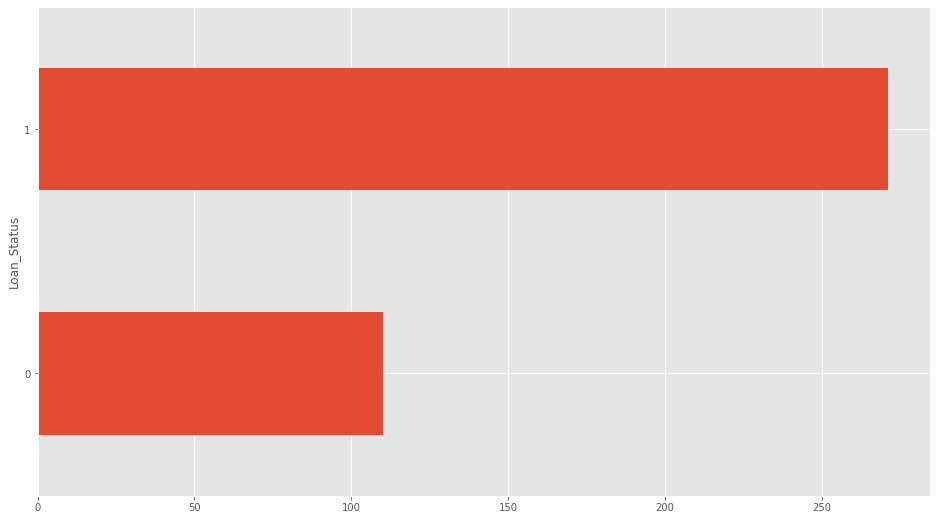

In [ ]:
df_bank.groupby('Loan_Status').size().plot.barh()

##Paso 8: Separar resultados en X y Y

In [ ]:
X = np.array(df_bank[["LoanAmount","ApplicantIncome"]])
y = np.array(df_bank['Loan_Status'])
#forma de la matriz
X.shape

(381, 2)

##Paso 9: encontramos el total de clousters (agrupamientos) idoneo

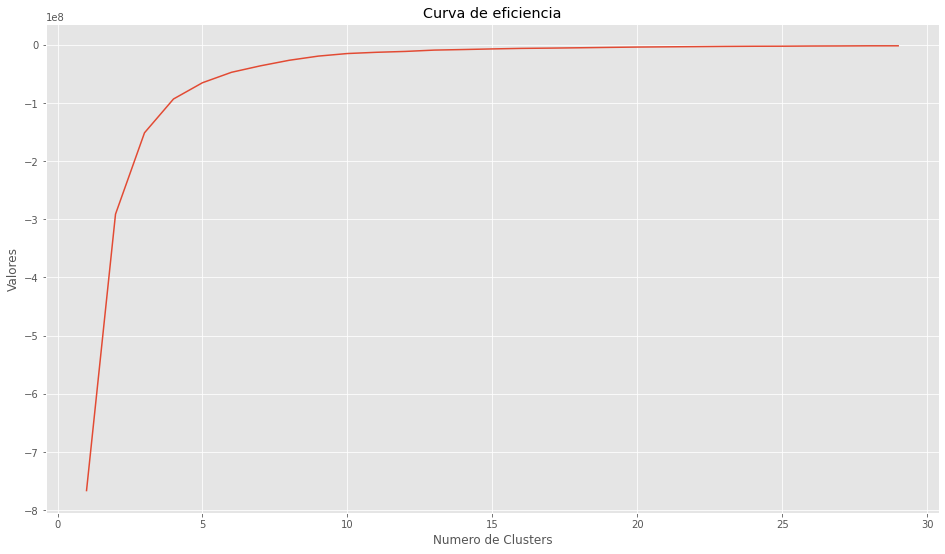

In [ ]:
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

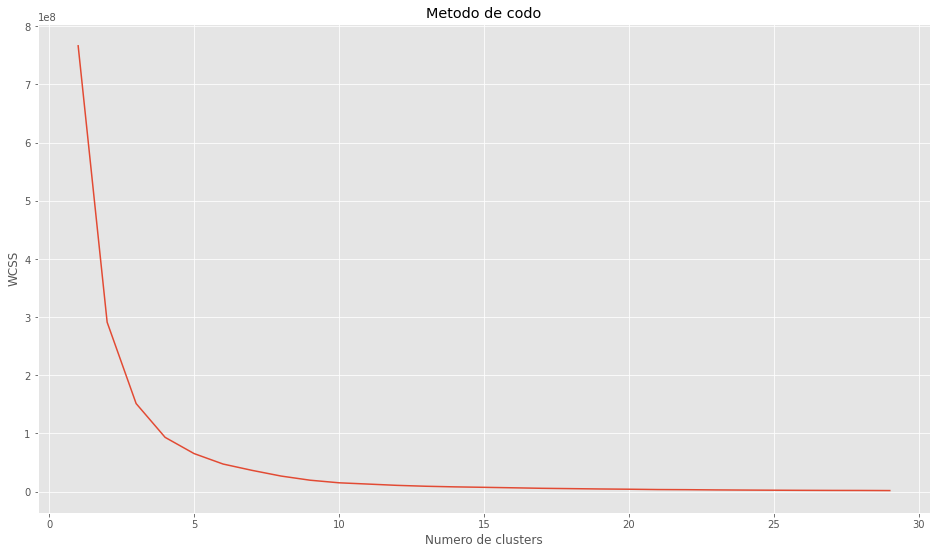

In [ ]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##Paso 10:Conocer los centroides

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[  95.94736842 2181.77192982]
 [ 119.40625    5784.3125    ]
 [ 104.19117647 3280.13970588]
 [ 119.66666667 7712.13333333]
 [ 110.42857143 4384.76190476]]


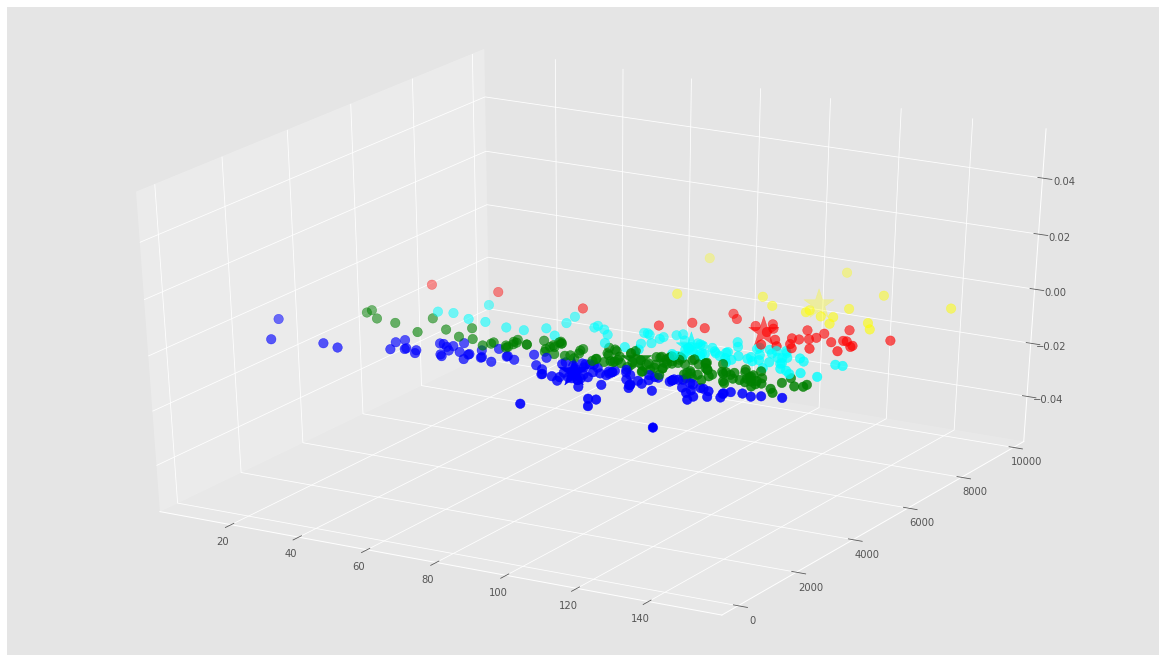

In [ ]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan'] 
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar, s=90)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
   

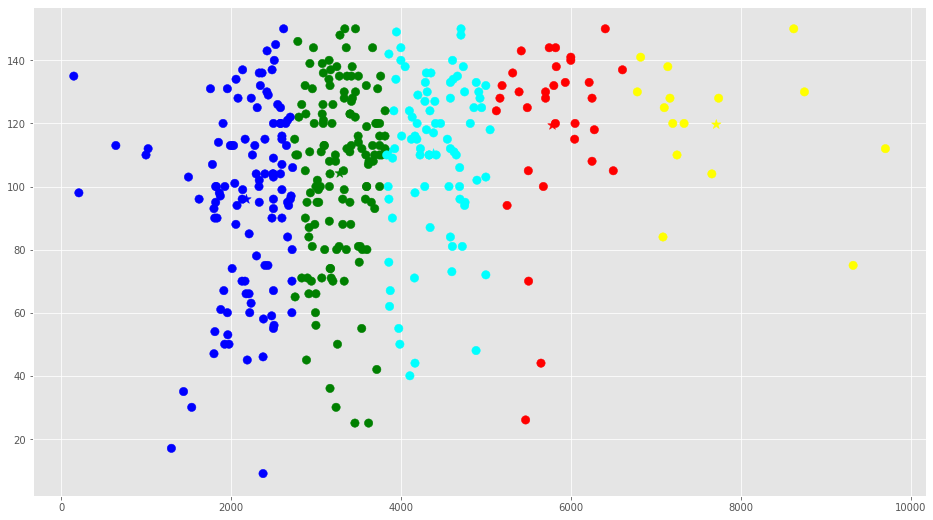

In [ ]:
f1 = df_bank['ApplicantIncome'].values
f2 = df_bank['LoanAmount'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c=colores, s=100)
plt.show()

##Paso 11: Ver resultados en tablas

In [ ]:
df_cluster = pd.DataFrame()

df_cluster['Loan Status']= df_bank.Loan_Status
df_cluster['Usuario']= df_bank.Loan_ID
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,Loan Status,Usuario,cluster
0,0,LP001003,4
1,1,LP001005,2
2,1,LP001006,0
3,1,LP001008,1
4,1,LP001013,0


##Paso 12: Diversidad por categorias

In [ ]:
df_cluster[df_cluster.cluster == 2]

,Loan Status,Usuario,cluster
1,1,LP001005,2
5,1,LP001024,2
10,1,LP001034,2
11,0,LP001036,2
16,0,LP001050,2
...,...,...,...
367,0,LP002911,2
372,1,LP002928,2
375,0,LP002943,2
377,1,LP002974,2


In [ ]:
X_new = np.array([[70.0,3200]]) 
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
